# 2天学会Pandas

## 目录
## 0.导语
## 1.Series
## 2.DataFrame
### 2.1 DataFrame的简单运用

## 3.pandas选择数据
### 3.1 实战筛选
### 3.2 筛选总结

## 4.Pandas设置值
### 4.1 创建数据
### 4.2 根据位置设置loc和iloc
### 4.3 根据条件设置
### 4.4 按行或列设置
### 4.5 添加Series序列(长度必须对齐)
### 4.6 设定某行某列为特定值
### 4.7 修改一整行数据

## 5.Pandas处理丢失数据
### 5.1 创建含NaN的矩阵
### 5.2 删除掉有NaN的行或列
### 5.3 替换NaN值为0或者其他
### 5.4 是否有缺失数据NaN

## 6.Pandas导入导出
### 6.1 导入数据
### 6.2 导出数据

## 7.Pandas合并操作
### 7.1 Pandas合并concat
### 7.2.Pandas 合并 merge
    *  7.2.1 定义资料集并打印出
    *  7.2.2 依据key column合并,并打印
    *  7.2.3 两列合并
    *  7.2.4 Indicator设置合并列名称
    *  7.2.5 依据index合并
    *  7.2.6 解决overlapping的问题

## 8.Pandas plot出图

## 9.学习来源

## 0.导语

Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单。

本文作者：光城

## 1.Series

In [1]:
import pandas as pd
import numpy as np

# Series
s = pd.Series([1,3,6,np.nan,44,1])
print(s)
# 默认index从0开始,如果想要按照自己的索引设置，则修改index参数,如:index=[3,4,3,7,8,9]

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


## 2.DataFrame

### 2.1 DataFrame的简单运用

In [2]:
# DataFrame
dates = pd.date_range('2018-08-19',periods=6)
# dates = pd.date_range('2018-08-19','2018-08-24') # 起始、结束  与上述等价
'''
numpy.random.randn(d0, d1, …, dn)是从标准正态分布中返回一个或多个样本值。
numpy.random.rand(d0, d1, …, dn)的随机样本位于[0, 1)中。
(6,4)表示6行4列数据
'''
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
print(df)
# DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典。

                   a         b         c         d
2018-08-19 -0.493739 -1.308738  0.261489  1.322140
2018-08-20 -1.738107  0.699740  1.483715  1.103715
2018-08-21  1.843806  0.636613 -0.605184 -0.809692
2018-08-22 -0.044920  0.275286  1.536055  1.219944
2018-08-23  0.688810 -0.870828 -0.424904 -1.369430
2018-08-24 -0.670488  0.175906  0.214264 -1.099845


In [3]:
print(df['b'])

2018-08-19   -1.308738
2018-08-20    0.699740
2018-08-21    0.636613
2018-08-22    0.275286
2018-08-23   -0.870828
2018-08-24    0.175906
Freq: D, Name: b, dtype: float64


In [4]:
# 未指定行标签和列标签的数据
df1 = pd.DataFrame(np.arange(12).reshape(3,4))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [5]:
# 另一种方式
df2 = pd.DataFrame({
    'A': [1,2,3,4],
    'B': pd.Timestamp('20180819'),
    'C': pd.Series([1,6,9,10],dtype='float32'),
    'D': np.array([3] * 4,dtype='int32'),
    'E': pd.Categorical(['test','train','test','train']),
    'F': 'foo'
})
print(df2)

   A          B     C  D      E    F
0  1 2018-08-19   1.0  3   test  foo
1  2 2018-08-19   6.0  3  train  foo
2  3 2018-08-19   9.0  3   test  foo
3  4 2018-08-19  10.0  3  train  foo


In [6]:
print(df2.index)

RangeIndex(start=0, stop=4, step=1)


In [7]:
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [8]:
print(df2.values)

[[1 Timestamp('2018-08-19 00:00:00') 1.0 3 'test' 'foo']
 [2 Timestamp('2018-08-19 00:00:00') 6.0 3 'train' 'foo']
 [3 Timestamp('2018-08-19 00:00:00') 9.0 3 'test' 'foo']
 [4 Timestamp('2018-08-19 00:00:00') 10.0 3 'train' 'foo']]


In [9]:
# 数据总结
print(df2.describe())

              A          C    D
count  4.000000   4.000000  4.0
mean   2.500000   6.500000  3.0
std    1.290994   4.041452  0.0
min    1.000000   1.000000  3.0
25%    1.750000   4.750000  3.0
50%    2.500000   7.500000  3.0
75%    3.250000   9.250000  3.0
max    4.000000  10.000000  3.0


In [10]:
# 翻转数据
print(df2.T)
# print(np.transpose(df2))等价于上述操作

                     0                    1                    2  \
A                    1                    2                    3   
B  2018-08-19 00:00:00  2018-08-19 00:00:00  2018-08-19 00:00:00   
C                    1                    6                    9   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    4  
B  2018-08-19 00:00:00  
C                   10  
D                    3  
E                train  
F                  foo  


In [11]:
'''
axis=1表示行
axis=0表示列
默认ascending(升序)为True
ascending=True表示升序,ascending=False表示降序
下面两行分别表示按行升序与按行降序
'''
print(df2.sort_index(axis=1,ascending=True))

   A          B     C  D      E    F
0  1 2018-08-19   1.0  3   test  foo
1  2 2018-08-19   6.0  3  train  foo
2  3 2018-08-19   9.0  3   test  foo
3  4 2018-08-19  10.0  3  train  foo


In [12]:
print(df2.sort_index(axis=1,ascending=False))

     F      E  D     C          B  A
0  foo   test  3   1.0 2018-08-19  1
1  foo  train  3   6.0 2018-08-19  2
2  foo   test  3   9.0 2018-08-19  3
3  foo  train  3  10.0 2018-08-19  4


In [13]:
# 表示按列降序与按列升序
print(df2.sort_index(axis=0,ascending=False))

   A          B     C  D      E    F
3  4 2018-08-19  10.0  3  train  foo
2  3 2018-08-19   9.0  3   test  foo
1  2 2018-08-19   6.0  3  train  foo
0  1 2018-08-19   1.0  3   test  foo


In [14]:
print(df2.sort_index(axis=0,ascending=True))

   A          B     C  D      E    F
0  1 2018-08-19   1.0  3   test  foo
1  2 2018-08-19   6.0  3  train  foo
2  3 2018-08-19   9.0  3   test  foo
3  4 2018-08-19  10.0  3  train  foo


In [15]:
# 对特定列数值排列
# 表示对C列降序排列
print(df2.sort_values(by='C',ascending=False))

   A          B     C  D      E    F
3  4 2018-08-19  10.0  3  train  foo
2  3 2018-08-19   9.0  3   test  foo
1  2 2018-08-19   6.0  3  train  foo
0  1 2018-08-19   1.0  3   test  foo


## 3.pandas选择数据

### 3.1 实战筛选

In [16]:
import pandas as pd
import numpy as np
dates = pd.date_range('20180819', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2018-08-19   0   1   2   3
2018-08-20   4   5   6   7
2018-08-21   8   9  10  11
2018-08-22  12  13  14  15
2018-08-23  16  17  18  19
2018-08-24  20  21  22  23


In [17]:
# 检索A列
print(df['A'])

2018-08-19     0
2018-08-20     4
2018-08-21     8
2018-08-22    12
2018-08-23    16
2018-08-24    20
Freq: D, Name: A, dtype: int32


In [18]:
print(df.A)

2018-08-19     0
2018-08-20     4
2018-08-21     8
2018-08-22    12
2018-08-23    16
2018-08-24    20
Freq: D, Name: A, dtype: int32


In [19]:
# 选择跨越多行或多列
# 选取前3行
print(df[0:3])

            A  B   C   D
2018-08-19  0  1   2   3
2018-08-20  4  5   6   7
2018-08-21  8  9  10  11


In [20]:
print(df['2018-08-19':'2018-08-21'])

            A  B   C   D
2018-08-19  0  1   2   3
2018-08-20  4  5   6   7
2018-08-21  8  9  10  11


In [21]:
# 根据标签选择数据
# 获取特定行或列
# 指定行数据
print(df.loc['20180819'])

A    0
B    1
C    2
D    3
Name: 2018-08-19 00:00:00, dtype: int32


In [22]:
# 指定列
# 两种方式
print(df.loc[:,'A':'B'])

             A   B
2018-08-19   0   1
2018-08-20   4   5
2018-08-21   8   9
2018-08-22  12  13
2018-08-23  16  17
2018-08-24  20  21


In [23]:
print(df.loc[:,['A','B']])

             A   B
2018-08-19   0   1
2018-08-20   4   5
2018-08-21   8   9
2018-08-22  12  13
2018-08-23  16  17
2018-08-24  20  21


In [24]:
# 行与列同时检索
print(df.loc['20180819',['A','B']])

A    0
B    1
Name: 2018-08-19 00:00:00, dtype: int32


In [25]:
# 根据序列iloc
# 获取特定位置的值
print(df.iloc[3,1])

13


In [26]:
print(df.iloc[3:5,1:3]) # 不包含末尾5或3，同列表切片

             B   C
2018-08-22  13  14
2018-08-23  17  18


In [27]:
# 跨行操作
print(df.iloc[[1,3,5],1:3])

             B   C
2018-08-20   5   6
2018-08-22  13  14
2018-08-24  21  22


In [28]:
# 混合选择
print(df.ix[:3,['A','C']])

            A   C
2018-08-19  0   2
2018-08-20  4   6
2018-08-21  8  10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [29]:
print(df.iloc[:3,[0,2]]) # 结果同上

            A   C
2018-08-19  0   2
2018-08-20  4   6
2018-08-21  8  10


In [30]:
# 通过判断的筛选
print(df[df.A>8])

             A   B   C   D
2018-08-22  12  13  14  15
2018-08-23  16  17  18  19
2018-08-24  20  21  22  23


In [31]:
# 通过判断的筛选
print(df.loc[df.A>8])

             A   B   C   D
2018-08-22  12  13  14  15
2018-08-23  16  17  18  19
2018-08-24  20  21  22  23


* 3.2 筛选总结

1.iloc与ix区别
  > 总结:相同点：iloc可以取相应的值，操作方便,与ix操作类似。
  
  > 不同点：ix可以混合选择，可以填入column对应的字符选择，而iloc只能采用index索引，对于列数较多情况下，ix要方便操作许多。
  
2.loc与iloc区别
  > 总结：相同点：都可以索引处块数据
  
  > 不同点：iloc可以检索对应值,两者操作不同。
  
3.ix与loc、iloc三者的区别
  > n总结：ix是混合loc与iloc操作
  
如下:对比三者操作,输出结果相同

In [32]:
print(df.loc['20180819','A':'B'])
print(df.iloc[0,0:2])
print(df.ix[0,'A':'B'])

A    0
B    1
Name: 2018-08-19 00:00:00, dtype: int32
A    0
B    1
Name: 2018-08-19 00:00:00, dtype: int32
A    0
B    1
Name: 2018-08-19 00:00:00, dtype: int32


## 4.Pandas设置值

### 4.1 创建数据

In [33]:
import pandas as pd
import numpy as np
# 创建数据
dates = pd.date_range('20180820',periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4), index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2018-08-20   0   1   2   3
2018-08-21   4   5   6   7
2018-08-22   8   9  10  11
2018-08-23  12  13  14  15
2018-08-24  16  17  18  19
2018-08-25  20  21  22  23


### 4.2 根据位置设置loc和iloc

In [34]:
# 根据位置设置loc和iloc
df.iloc[2,2] = 111
df.loc['20180820','B'] = 2222
print(df)

             A     B    C   D
2018-08-20   0  2222    2   3
2018-08-21   4     5    6   7
2018-08-22   8     9  111  11
2018-08-23  12    13   14  15
2018-08-24  16    17   18  19
2018-08-25  20    21   22  23


### 4.3 根据条件设置

In [35]:
# 根据条件设置
# 更改B中的数，而更改的位置取决于4的位置，并设相应位置的数为0
df.B[df.A>4] = 0
print(df)

             A     B    C   D
2018-08-20   0  2222    2   3
2018-08-21   4     5    6   7
2018-08-22   8     0  111  11
2018-08-23  12     0   14  15
2018-08-24  16     0   18  19
2018-08-25  20     0   22  23


In [36]:
df.B.loc[df.A>4] = 0
print(df)

             A     B    C   D
2018-08-20   0  2222    2   3
2018-08-21   4     5    6   7
2018-08-22   8     0  111  11
2018-08-23  12     0   14  15
2018-08-24  16     0   18  19
2018-08-25  20     0   22  23


### 4.4 按行或列设置

In [37]:
# 按行或列设置
# 列批处理，F列全改为NaN
df['F'] = np.nan
print(df)

             A     B    C   D   F
2018-08-20   0  2222    2   3 NaN
2018-08-21   4     5    6   7 NaN
2018-08-22   8     0  111  11 NaN
2018-08-23  12     0   14  15 NaN
2018-08-24  16     0   18  19 NaN
2018-08-25  20     0   22  23 NaN


### 4.5 添加Series序列(长度必须对齐)

In [38]:
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180820',periods=6))
print(df)

             A     B    C   D   F  E
2018-08-20   0  2222    2   3 NaN  1
2018-08-21   4     5    6   7 NaN  2
2018-08-22   8     0  111  11 NaN  3
2018-08-23  12     0   14  15 NaN  4
2018-08-24  16     0   18  19 NaN  5
2018-08-25  20     0   22  23 NaN  6


### 4.6 设定某行某列为特定值

In [39]:
# 设定某行某列为特定值
df.ix['20180820','A'] = 56
print(df)
#ix 以后要剥离了，尽量不要用了

             A     B    C   D   F  E
2018-08-20  56  2222    2   3 NaN  1
2018-08-21   4     5    6   7 NaN  2
2018-08-22   8     0  111  11 NaN  3
2018-08-23  12     0   14  15 NaN  4
2018-08-24  16     0   18  19 NaN  5
2018-08-25  20     0   22  23 NaN  6


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [40]:
df.loc['20180820','A'] = 67
print(df)

             A     B    C   D   F  E
2018-08-20  67  2222    2   3 NaN  1
2018-08-21   4     5    6   7 NaN  2
2018-08-22   8     0  111  11 NaN  3
2018-08-23  12     0   14  15 NaN  4
2018-08-24  16     0   18  19 NaN  5
2018-08-25  20     0   22  23 NaN  6


In [41]:
df.iloc[0,0] = 76
print(df)

             A     B    C   D   F  E
2018-08-20  76  2222    2   3 NaN  1
2018-08-21   4     5    6   7 NaN  2
2018-08-22   8     0  111  11 NaN  3
2018-08-23  12     0   14  15 NaN  4
2018-08-24  16     0   18  19 NaN  5
2018-08-25  20     0   22  23 NaN  6


### 4.7 修改一整行数据

In [42]:
# 修改一整行数据
df.iloc[1] = np.nan # df.iloc[1,:]=np.nan
print(df)

               A       B      C     D   F    E
2018-08-20  76.0  2222.0    2.0   3.0 NaN  1.0
2018-08-21   NaN     NaN    NaN   NaN NaN  NaN
2018-08-22   8.0     0.0  111.0  11.0 NaN  3.0
2018-08-23  12.0     0.0   14.0  15.0 NaN  4.0
2018-08-24  16.0     0.0   18.0  19.0 NaN  5.0
2018-08-25  20.0     0.0   22.0  23.0 NaN  6.0


In [43]:
df.loc['20180820'] = np.nan # df.loc['20180820,:']=np.nan
print(df)

               A    B      C     D   F    E
2018-08-20   NaN  NaN    NaN   NaN NaN  NaN
2018-08-21   NaN  NaN    NaN   NaN NaN  NaN
2018-08-22   8.0  0.0  111.0  11.0 NaN  3.0
2018-08-23  12.0  0.0   14.0  15.0 NaN  4.0
2018-08-24  16.0  0.0   18.0  19.0 NaN  5.0
2018-08-25  20.0  0.0   22.0  23.0 NaN  6.0


In [44]:
df.ix[2] = np.nan # df.ix[2,:]=np.nan
print(df)

               A    B     C     D   F    E
2018-08-20   NaN  NaN   NaN   NaN NaN  NaN
2018-08-21   NaN  NaN   NaN   NaN NaN  NaN
2018-08-22   NaN  NaN   NaN   NaN NaN  NaN
2018-08-23  12.0  0.0  14.0  15.0 NaN  4.0
2018-08-24  16.0  0.0  18.0  19.0 NaN  5.0
2018-08-25  20.0  0.0  22.0  23.0 NaN  6.0


In [45]:
df.ix['20180823'] = np.nan
print(df)

               A    B     C     D   F    E
2018-08-20   NaN  NaN   NaN   NaN NaN  NaN
2018-08-21   NaN  NaN   NaN   NaN NaN  NaN
2018-08-22   NaN  NaN   NaN   NaN NaN  NaN
2018-08-23   NaN  NaN   NaN   NaN NaN  NaN
2018-08-24  16.0  0.0  18.0  19.0 NaN  5.0
2018-08-25  20.0  0.0  22.0  23.0 NaN  6.0


## 5.Pandas处理丢失数据

### 5.1 创建含NaN的矩阵

In [46]:
# Pandas处理丢失数据
import pandas as pd
import numpy as np
# 创建含NaN的矩阵
# 如何填充和删除NaN数据?
dates = pd.date_range('20180820',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D']) 
print(df)

             A   B   C   D
2018-08-20   0   1   2   3
2018-08-21   4   5   6   7
2018-08-22   8   9  10  11
2018-08-23  12  13  14  15
2018-08-24  16  17  18  19
2018-08-25  20  21  22  23


In [47]:
# a.reshape(6,4)等价于a.reshape((6,4))
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

             A     B     C   D
2018-08-20   0   NaN   2.0   3
2018-08-21   4   5.0   NaN   7
2018-08-22   8   9.0  10.0  11
2018-08-23  12  13.0  14.0  15
2018-08-24  16  17.0  18.0  19
2018-08-25  20  21.0  22.0  23


### 5.2 删除掉有NaN的行或列

In [48]:
# 删除掉有NaN的行或列
print(df.dropna()) # 默认是删除掉含有NaN的行

             A     B     C   D
2018-08-22   8   9.0  10.0  11
2018-08-23  12  13.0  14.0  15
2018-08-24  16  17.0  18.0  19
2018-08-25  20  21.0  22.0  23


In [49]:
print(df.dropna(
    axis=0, # 0对行进行操作;1对列进行操作
    how='any' # 'any':只要存在NaN就drop掉；'all':必须全部是NaN才drop
))

             A     B     C   D
2018-08-22   8   9.0  10.0  11
2018-08-23  12  13.0  14.0  15
2018-08-24  16  17.0  18.0  19
2018-08-25  20  21.0  22.0  23


In [50]:
# 删除掉所有含有NaN的列
print(df.dropna(
    axis=1,
    how='any'
))

             A   D
2018-08-20   0   3
2018-08-21   4   7
2018-08-22   8  11
2018-08-23  12  15
2018-08-24  16  19
2018-08-25  20  23


### 5.3 替换NaN值为0或者其他

In [51]:
# 替换NaN值为0或者其他
print(df.fillna(value=0))

             A     B     C   D
2018-08-20   0   0.0   2.0   3
2018-08-21   4   5.0   0.0   7
2018-08-22   8   9.0  10.0  11
2018-08-23  12  13.0  14.0  15
2018-08-24  16  17.0  18.0  19
2018-08-25  20  21.0  22.0  23


### 5.4 是否有缺失数据NaN

In [52]:
# 是否有缺失数据NaN
# 是否为空
print(df.isnull())

                A      B      C      D
2018-08-20  False   True  False  False
2018-08-21  False  False   True  False
2018-08-22  False  False  False  False
2018-08-23  False  False  False  False
2018-08-24  False  False  False  False
2018-08-25  False  False  False  False


In [53]:
# 是否为NaN
print(df.isna())

                A      B      C      D
2018-08-20  False   True  False  False
2018-08-21  False  False   True  False
2018-08-22  False  False  False  False
2018-08-23  False  False  False  False
2018-08-24  False  False  False  False
2018-08-25  False  False  False  False


In [54]:
# 检测某列是否有缺失数据NaN
print(df.isnull().any())

A    False
B     True
C     True
D    False
dtype: bool


In [55]:
# 检测数据中是否存在NaN,如果存在就返回True
print(np.any(df.isnull())==True)

True


## 6.Pandas导入导出

### 6.1 导入数据

In [56]:
import pandas as pd # 加载模块
# 读取csv
data = pd.read_csv('student.csv')
# 打印出data
print(data)

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


In [57]:
# 前三行
print(data.head(3))

   Student ID  name   age  gender
0        1100  Kelly   22  Female
1        1101    Clo   21  Female
2        1102  Tilly   22  Female


In [58]:
# 后三行
print(data.tail(3))

    Student ID name   age  gender
11        1111    Dw    3  Female
12        1112     Q   23    Male
13        1113     W   21  Female


### 6.2 导出数据

In [59]:
# 将资料存取成pickle
data.to_pickle('student.pickle')

In [60]:
# 读取pickle文件并打印
print(pd.read_pickle('student.pickle'))

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


## 7.Pandas合并操作

### 7.1 Pandas合并concat

In [61]:
import pandas as pd
import numpy as np

# 定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
print(df1)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0


In [62]:
print(df2)

     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0


In [63]:
print(df3)

     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [64]:
# concat纵向合并
res = pd.concat([df1,df2,df3],axis=0)

# 打印结果
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [65]:
# 上述合并过程中，index重复，下面给出重置index方法
# 只需要将index_ignore设定为True即可
res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)

# 打印结果
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [66]:
# join 合并方式
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
print(df1)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0


In [67]:
print(df2)

     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [68]:
'''
join='outer',函数默认为join='outer'。此方法是依照column来做纵向合并，有相同的column上下合并在一起，
其他独自的column各自成列，原来没有值的位置皆为NaN填充。
'''
# 纵向"外"合并df1与df2
res = pd.concat([df1,df2],axis=0,join='outer')

print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [69]:
# 修改index
res = pd.concat([df1,df2],axis=0,join='outer',ignore_index=True)

print(res)

     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0
5  NaN  1.0  1.0  1.0  1.0


In [70]:
# join='inner'合并相同的字段
# 纵向"内"合并df1与df2
res = pd.concat([df1,df2],axis=0,join='inner')
# 打印结果
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [71]:
# join_axes(依照axes合并)
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
print(df1)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0


In [72]:
print(df2)

     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [73]:
# 依照df1.index进行横向合并
res = pd.concat([df1,df2],axis=1,join_axes=[df1.index])
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [74]:
# 移除join_axes参数,打印结果
res = pd.concat([df1,df2],axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


In [75]:
# append(添加数据)
# append只有纵向合并，没有横向合并
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
# 将df2合并到df1下面,以及重置index,并打印出结果
res = df1.append(df2,ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [76]:
# 合并多个df,将df2与df3合并至df1的下面,以及重置index,并打印出结果
res = df1.append([df2,df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [77]:
# 合并series,将s1合并至df1，以及重置index，并打印结果
res = df1.append(s1,ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


In [78]:
# 总结:两种常用合并方式
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
res1 = df1.append([df2, df3], ignore_index=True)
print(res)
print(res1)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


### 7.2.Pandas 合并 merge

#### 7.2.1 定义资料集并打印出

In [79]:
import pandas as pd
# 依据一组key合并
# 定义资料集并打印出
left = pd.DataFrame({'key' : ['K0','K1','K2','K3'],
                     'A' : ['A0','A1','A2','A3'],
                     'B' : ['B0','B1','B2','B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C' : ['C0', 'C1', 'C2', 'C3'],
                      'D' : ['D0', 'D1', 'D2', 'D3']})
print(left)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3


In [80]:
print(right)

    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


#### 7.2.2 依据key column合并,并打印

In [81]:
# 依据key column合并,并打印
res = pd.merge(left,right,on='key')
print(res)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


In [82]:
#  依据两组key合并
#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
print(left)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1


In [83]:
print(right)

    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0


#### 7.2.3 两列合并

In [84]:
# 依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2


In [85]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3


In [86]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN


In [87]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K1   K0  C1  D1
2   A2   B2   K1   K0  C2  D2
3  NaN  NaN   K2   K0  C3  D3


#### 7.2.4 Indicator设置合并列名称

In [88]:
# Indicator
df1 = pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)

   col1 col_left
0     0        a
1     1        b


In [89]:
print(df2)

   col1  col_right
0     1          2
1     2          2
2     2          2


In [90]:
# 依据col1进行合并,并启用indicator=True,最后打印
res = pd.merge(df1,df2,on='col1',how='outer',indicator=True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [91]:
# 自定义indicator column的名称,并打印出
res = pd.merge(df1,df2,on='col1',how='outer',indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


#### 7.2.5 依据index合并

In [92]:
# 依据index合并
#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2


In [93]:
print(right)

     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [94]:
# 依据左右资料集的index进行合并,how='outer',并打印
res = pd.merge(left,right,left_index=True,right_index=True,how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [95]:
# 依据左右资料集的index进行合并,how='inner',并打印
res = pd.merge(left,right,left_index=True,right_index=True,how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


#### 7.2.6 解决overlapping的问题

In [96]:
# 解决overlapping的问题
#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)

   age   k
0    1  K0
1    2  K1
2    3  K2


In [97]:
print(girls)

   age   k
0    4  K0
1    5  K0
2    6  K3


In [98]:
# 使用suffixes解决overlapping的问题
# 比如将上面两个合并时,age重复了,则可通过suffixes设置,以此保证不重复,不同名
res = pd.merge(boys,girls,on='k',suffixes=['_boy','_girl'],how='inner')
print(res)

   age_boy   k  age_girl
0        1  K0         4
1        1  K0         5


## 8.Pandas plot出图

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.Series(np.random.randn(1000), index=np.arange(1000))
print(data)

0      0.143408
1     -1.936116
2     -1.488609
3      1.372508
4     -0.907693
5      0.665021
6     -0.629525
7     -0.470715
8     -1.059255
9     -1.688154
10    -0.254145
11    -0.070213
12     0.057894
13    -0.805895
14     1.688675
15     0.241852
16    -0.967129
17    -1.422592
18     0.873210
19     1.629350
20    -0.248667
21    -0.871348
22     0.088175
23     0.796791
24    -0.457708
25    -1.453474
26     1.997726
27    -1.877039
28    -0.601735
29    -0.659616
         ...   
970   -1.093692
971    0.059065
972   -0.657221
973    0.452148
974   -0.487552
975    0.375511
976    0.287918
977    1.351101
978    1.799478
979   -0.372078
980   -1.320401
981   -2.115900
982   -1.617493
983   -2.343383
984    2.155813
985    0.031667
986   -1.021759
987    0.948910
988    1.464946
989   -0.296323
990    0.071010
991   -0.087358
992   -0.580351
993   -1.497217
994   -0.459714
995    0.125293
996    0.803825
997    0.327007
998   -1.617468
999   -0.115447
Length: 1000, dtype: flo

In [100]:
print(data.cumsum())

0       0.143408
1      -1.792708
2      -3.281317
3      -1.908809
4      -2.816503
5      -2.151481
6      -2.781007
7      -3.251721
8      -4.310977
9      -5.999131
10     -6.253275
11     -6.323489
12     -6.265594
13     -7.071490
14     -5.382814
15     -5.140962
16     -6.108091
17     -7.530683
18     -6.657472
19     -5.028122
20     -5.276789
21     -6.148137
22     -6.059962
23     -5.263171
24     -5.720880
25     -7.174354
26     -5.176628
27     -7.053667
28     -7.655402
29     -8.315018
         ...    
970    22.363987
971    22.423053
972    21.765832
973    22.217979
974    21.730427
975    22.105938
976    22.393856
977    23.744957
978    25.544435
979    25.172357
980    23.851955
981    21.736056
982    20.118563
983    17.775180
984    19.930993
985    19.962660
986    18.940901
987    19.889810
988    21.354757
989    21.058433
990    21.129443
991    21.042085
992    20.461734
993    18.964517
994    18.504803
995    18.630096
996    19.433921
997    19.7609

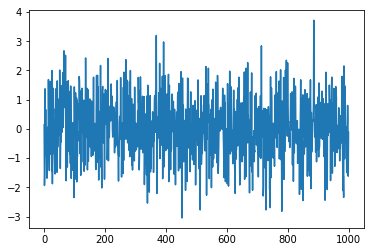

In [101]:
# data本来就是一个数据，所以我们可以直接plot
data.plot()
plt.show()

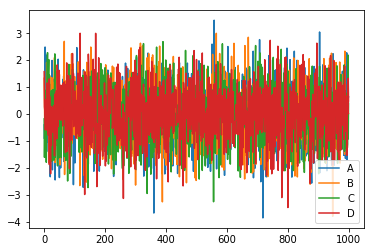

In [102]:
# np.random.randn(1000,4) 随机生成1000行4列数据
# list("ABCD")会变为['A','B','C','D']
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
)
data.cumsum()
data.plot()
plt.show()

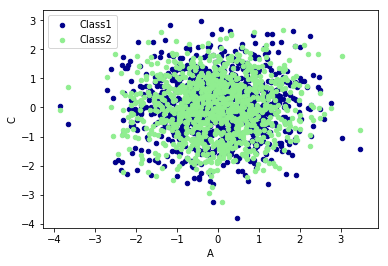

In [103]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()

## 9.学习来源

https://morvanzhou.github.io/tutorials/data-manipulation/np-pd/